In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw
                                                            , postgres_host, postgres_port, postgres_db))

stp = pd.read_sql_query('select * from studentsperformance', con=engine)

engine.dispose()

### 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

In [2]:
stp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
stp['total score mean'] = (stp['math score'] + stp['reading score'] + stp['writing score'])/3

In [4]:
stp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score mean
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [5]:
overview = stp.groupby(['gender', 'race/ethnicity', 'parental level of education']).mean()

In [6]:
overview.drop(columns=['math score', 'reading score', 'writing score'], axis=1)

total score mean
gender race/ethnicity parental level of education                  
female group A        associate's degree                  65.277778
                      bachelor's degree                   57.777778
                      high school                         66.142857
                      master's degree                     58.500000
                      some college                        67.833333
                      some high school                    65.700000
       group B        associate's degree                  68.840580
                      bachelor's degree                   77.090909
                      high school                         64.952381
                      master's degree                     79.533333
                      some college                        66.466667
                      some high school                    62.560606
       group C        associate's degree                  70.785185
                      bachelor's degree                   74.025641
                      high school                         61.877778
                      master's degree                     69.714286
                      some college                        70.022727
                      some high school                    64.642857
       group D        associate's degree                  69.888889
                      bachelor's degree                   76.000000
                      high school                         66.313725
                      master's degree                     73.488889
                      some college                        73.933333
                      some high school                    69.320000
       group E        associate's degree                  78.481481
                      bachelor's degree                   77.033333
                      high school                         68.416667
                      master's degree                     78.047619
                      some college                        73.125000
                      some high school                    65.000000
male   group A        associate's degree                  62.833333
                      bachelor's degree                   71.222222
                      high school                         58.181818
                      master's degree                     73.000000
                      some college                        62.533333
                      some high school                    55.690476
       group B        associate's degree                  66.870370
                      bachelor's degree                   64.222222
                      high school                         56.666667
                      master's degree                     51.333333
                      some college                        62.954545
                      some high school                    66.666667
       group C        associate's degree                  67.454545
                      bachelor's degree                   71.785714
                      high school                         62.725490
                      master's degree                     68.638889
                      some college                        63.906667
                      some high school                    61.174603
       group D        associate's degree                  68.820513
                      bachelor's degree                   64.555556
                      high school                         61.691358
                      master's degree                     82.083333
                      some college                        66.614583
                      some high school                    67.906667
       group E        associate's degree                  70.111111
                      bachelor's degree                   73.791667
                      high school                         70.900000
                      master's degree  

In [7]:
stp.groupby('gender').mean()[['math score', 'reading score', 'writing score']]

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


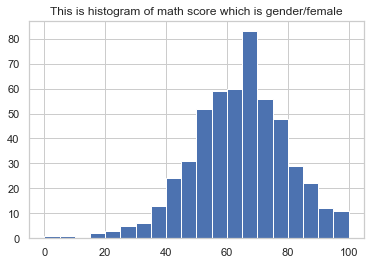

------------------------------------------------
Comparisons for variable: gender
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)


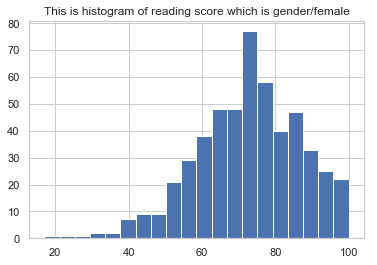

------------------------------------------------
Comparisons for variable: gender
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)


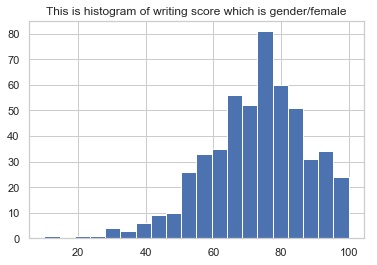

------------------------------------------------
Comparisons for variable: gender
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)


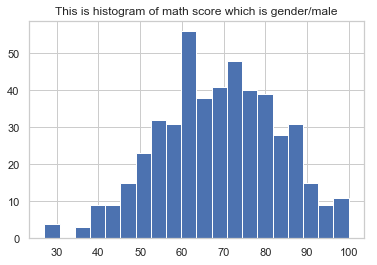

------------------------------------------------
Comparisons for variable: gender
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)


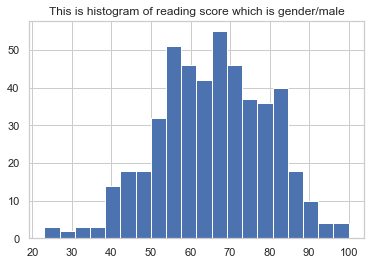

------------------------------------------------
Comparisons for variable: gender
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)


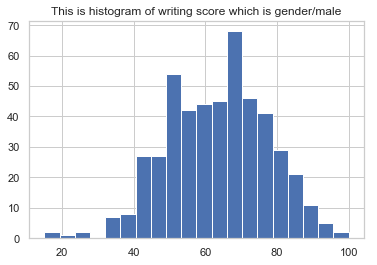

------------------------------------------------
Comparisons for variable: gender
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)


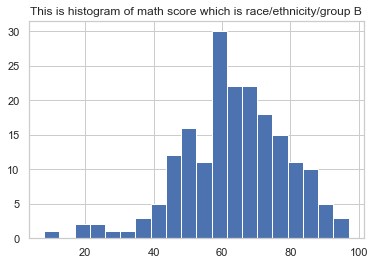

------------------------------------------------
Comparisons for variable: race/ethnicity
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group

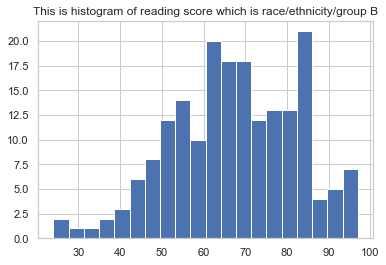

------------------------------------------------
Comparisons for variable: race/ethnicity
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-1.3223156212901772, pvalue=0.1866592809035069)
t-test between groups group B and group A:
Ttest_indResult(statistic=1.3633682262027682, pvalue=0.1738735513443721)
t-test between groups group B and group D:
Ttest_indResult(statistic=-1.9451563636864795, pvalue=0.0523786206559701)
t-test between groups group B and group E:
Ttest_indResult(statistic=-3.386066945409153, pvalue=0.0007951618495240944)
t-test between groups group C and group A:
Ttest_indResult(statistic=2.575432218066352, pvalue=0.010364398025471079)
t-test between groups group C and group D:
Ttest_indResult(statistic=-0.7970109316408917, pvalue=0.425771382113019)
t-test between groups group C and group E:
Ttest_indResult(statistic=-2.7133018645371685, pvalue=0.0069132842804986595)
t-test between groups group A and group

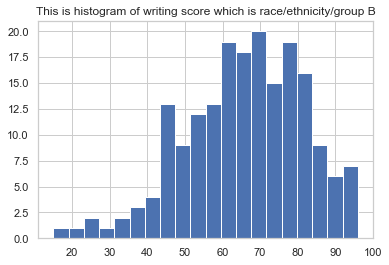

------------------------------------------------
Comparisons for variable: race/ethnicity
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-1.5964963433740407, pvalue=0.1110010959814519)
t-test between groups group B and group A:
Ttest_indResult(statistic=1.4624420577998105, pvalue=0.14475374198993884)
t-test between groups group B and group D:
Ttest_indResult(statistic=-3.19929333232526, pvalue=0.0014749978881319053)
t-test between groups group B and group E:
Ttest_indResult(statistic=-3.3831978345244518, pvalue=0.0008032300486353951)
t-test between groups group C and group A:
Ttest_indResult(statistic=2.848872404992454, pvalue=0.004610690740740428)
t-test between groups group C and group D:
Ttest_indResult(statistic=-1.8896631516726248, pvalue=0.05930232918708209)
t-test between groups group C and group E:
Ttest_indResult(statistic=-2.3502811868359177, pvalue=0.019183539018898285)
t-test between groups group A and g

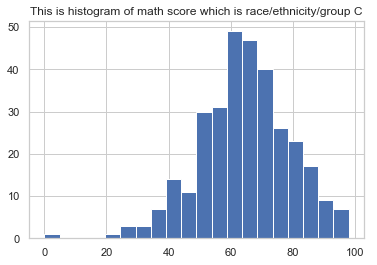

------------------------------------------------
Comparisons for variable: race/ethnicity
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group

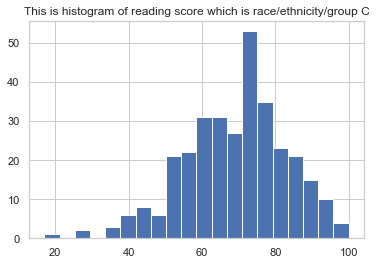

------------------------------------------------
Comparisons for variable: race/ethnicity
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-1.3223156212901772, pvalue=0.1866592809035069)
t-test between groups group B and group A:
Ttest_indResult(statistic=1.3633682262027682, pvalue=0.1738735513443721)
t-test between groups group B and group D:
Ttest_indResult(statistic=-1.9451563636864795, pvalue=0.0523786206559701)
t-test between groups group B and group E:
Ttest_indResult(statistic=-3.386066945409153, pvalue=0.0007951618495240944)
t-test between groups group C and group A:
Ttest_indResult(statistic=2.575432218066352, pvalue=0.010364398025471079)
t-test between groups group C and group D:
Ttest_indResult(statistic=-0.7970109316408917, pvalue=0.425771382113019)
t-test between groups group C and group E:
Ttest_indResult(statistic=-2.7133018645371685, pvalue=0.0069132842804986595)
t-test between groups group A and group

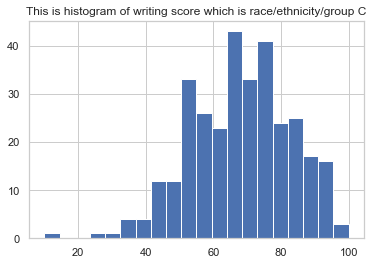

------------------------------------------------
Comparisons for variable: race/ethnicity
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-1.5964963433740407, pvalue=0.1110010959814519)
t-test between groups group B and group A:
Ttest_indResult(statistic=1.4624420577998105, pvalue=0.14475374198993884)
t-test between groups group B and group D:
Ttest_indResult(statistic=-3.19929333232526, pvalue=0.0014749978881319053)
t-test between groups group B and group E:
Ttest_indResult(statistic=-3.3831978345244518, pvalue=0.0008032300486353951)
t-test between groups group C and group A:
Ttest_indResult(statistic=2.848872404992454, pvalue=0.004610690740740428)
t-test between groups group C and group D:
Ttest_indResult(statistic=-1.8896631516726248, pvalue=0.05930232918708209)
t-test between groups group C and group E:
Ttest_indResult(statistic=-2.3502811868359177, pvalue=0.019183539018898285)
t-test between groups group A and g

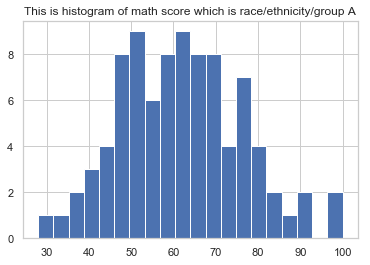

------------------------------------------------
Comparisons for variable: race/ethnicity
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group

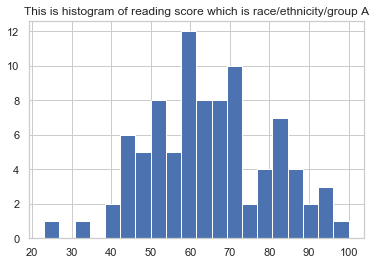

------------------------------------------------
Comparisons for variable: race/ethnicity
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-1.3223156212901772, pvalue=0.1866592809035069)
t-test between groups group B and group A:
Ttest_indResult(statistic=1.3633682262027682, pvalue=0.1738735513443721)
t-test between groups group B and group D:
Ttest_indResult(statistic=-1.9451563636864795, pvalue=0.0523786206559701)
t-test between groups group B and group E:
Ttest_indResult(statistic=-3.386066945409153, pvalue=0.0007951618495240944)
t-test between groups group C and group A:
Ttest_indResult(statistic=2.575432218066352, pvalue=0.010364398025471079)
t-test between groups group C and group D:
Ttest_indResult(statistic=-0.7970109316408917, pvalue=0.425771382113019)
t-test between groups group C and group E:
Ttest_indResult(statistic=-2.7133018645371685, pvalue=0.0069132842804986595)
t-test between groups group A and group

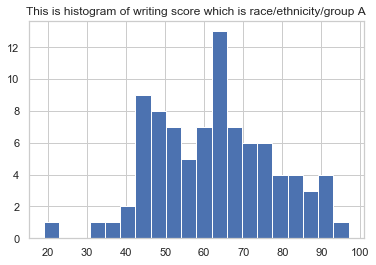

------------------------------------------------
Comparisons for variable: race/ethnicity
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-1.5964963433740407, pvalue=0.1110010959814519)
t-test between groups group B and group A:
Ttest_indResult(statistic=1.4624420577998105, pvalue=0.14475374198993884)
t-test between groups group B and group D:
Ttest_indResult(statistic=-3.19929333232526, pvalue=0.0014749978881319053)
t-test between groups group B and group E:
Ttest_indResult(statistic=-3.3831978345244518, pvalue=0.0008032300486353951)
t-test between groups group C and group A:
Ttest_indResult(statistic=2.848872404992454, pvalue=0.004610690740740428)
t-test between groups group C and group D:
Ttest_indResult(statistic=-1.8896631516726248, pvalue=0.05930232918708209)
t-test between groups group C and group E:
Ttest_indResult(statistic=-2.3502811868359177, pvalue=0.019183539018898285)
t-test between groups group A and g

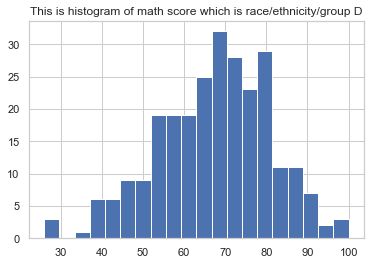

------------------------------------------------
Comparisons for variable: race/ethnicity
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group

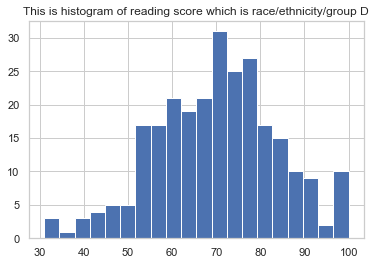

------------------------------------------------
Comparisons for variable: race/ethnicity
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-1.3223156212901772, pvalue=0.1866592809035069)
t-test between groups group B and group A:
Ttest_indResult(statistic=1.3633682262027682, pvalue=0.1738735513443721)
t-test between groups group B and group D:
Ttest_indResult(statistic=-1.9451563636864795, pvalue=0.0523786206559701)
t-test between groups group B and group E:
Ttest_indResult(statistic=-3.386066945409153, pvalue=0.0007951618495240944)
t-test between groups group C and group A:
Ttest_indResult(statistic=2.575432218066352, pvalue=0.010364398025471079)
t-test between groups group C and group D:
Ttest_indResult(statistic=-0.7970109316408917, pvalue=0.425771382113019)
t-test between groups group C and group E:
Ttest_indResult(statistic=-2.7133018645371685, pvalue=0.0069132842804986595)
t-test between groups group A and group

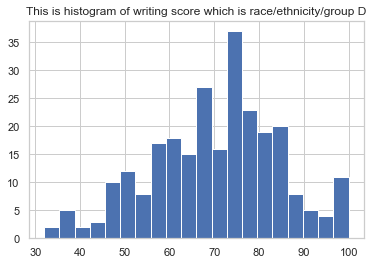

------------------------------------------------
Comparisons for variable: race/ethnicity
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-1.5964963433740407, pvalue=0.1110010959814519)
t-test between groups group B and group A:
Ttest_indResult(statistic=1.4624420577998105, pvalue=0.14475374198993884)
t-test between groups group B and group D:
Ttest_indResult(statistic=-3.19929333232526, pvalue=0.0014749978881319053)
t-test between groups group B and group E:
Ttest_indResult(statistic=-3.3831978345244518, pvalue=0.0008032300486353951)
t-test between groups group C and group A:
Ttest_indResult(statistic=2.848872404992454, pvalue=0.004610690740740428)
t-test between groups group C and group D:
Ttest_indResult(statistic=-1.8896631516726248, pvalue=0.05930232918708209)
t-test between groups group C and group E:
Ttest_indResult(statistic=-2.3502811868359177, pvalue=0.019183539018898285)
t-test between groups group A and g

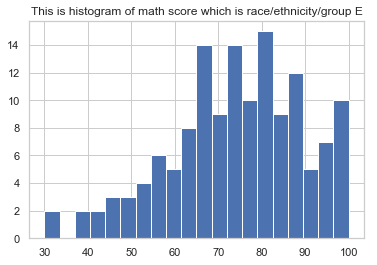

------------------------------------------------
Comparisons for variable: race/ethnicity
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group

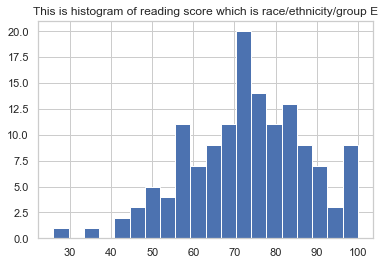

------------------------------------------------
Comparisons for variable: race/ethnicity
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-1.3223156212901772, pvalue=0.1866592809035069)
t-test between groups group B and group A:
Ttest_indResult(statistic=1.3633682262027682, pvalue=0.1738735513443721)
t-test between groups group B and group D:
Ttest_indResult(statistic=-1.9451563636864795, pvalue=0.0523786206559701)
t-test between groups group B and group E:
Ttest_indResult(statistic=-3.386066945409153, pvalue=0.0007951618495240944)
t-test between groups group C and group A:
Ttest_indResult(statistic=2.575432218066352, pvalue=0.010364398025471079)
t-test between groups group C and group D:
Ttest_indResult(statistic=-0.7970109316408917, pvalue=0.425771382113019)
t-test between groups group C and group E:
Ttest_indResult(statistic=-2.7133018645371685, pvalue=0.0069132842804986595)
t-test between groups group A and group

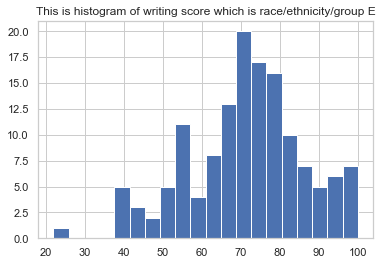

------------------------------------------------
Comparisons for variable: race/ethnicity
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-1.5964963433740407, pvalue=0.1110010959814519)
t-test between groups group B and group A:
Ttest_indResult(statistic=1.4624420577998105, pvalue=0.14475374198993884)
t-test between groups group B and group D:
Ttest_indResult(statistic=-3.19929333232526, pvalue=0.0014749978881319053)
t-test between groups group B and group E:
Ttest_indResult(statistic=-3.3831978345244518, pvalue=0.0008032300486353951)
t-test between groups group C and group A:
Ttest_indResult(statistic=2.848872404992454, pvalue=0.004610690740740428)
t-test between groups group C and group D:
Ttest_indResult(statistic=-1.8896631516726248, pvalue=0.05930232918708209)
t-test between groups group C and group E:
Ttest_indResult(statistic=-2.3502811868359177, pvalue=0.019183539018898285)
t-test between groups group A and g

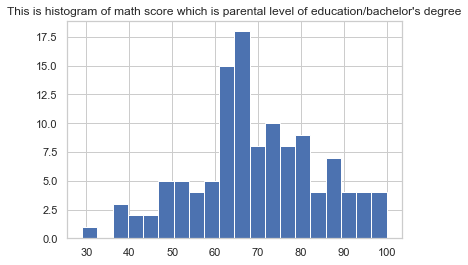

------------------------------------------------
Comparisons for variable: parental level of education
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and as

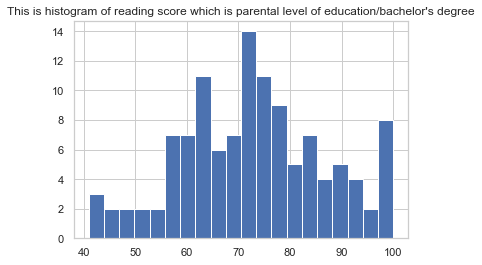

------------------------------------------------
Comparisons for variable: parental level of education
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=2.2048821209085077, pvalue=0.028127555314401052)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-1.0540858949475984, pvalue=0.29329675131787897)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=1.2977969850452833, pvalue=0.19524206483091092)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=5.017577900835298, pvalue=8.804250310784477e-07)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.4039270673798745, pvalue=0.0007561971719730451)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-2.888843374950649, pvalue=0.004165440800640354)
t-test between groups some college and a

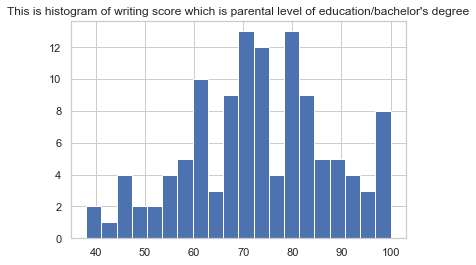

------------------------------------------------
Comparisons for variable: parental level of education
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=2.6803314684632196, pvalue=0.00771101202367254)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.9998741306804844, pvalue=0.3187519641464658)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=2.1159296639133762, pvalue=0.03508162451719667)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=6.547380937127048, pvalue=2.4076253789515874e-10)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=4.667733097498242, pvalue=4.628198526834338e-06)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-3.1687690632394907, pvalue=0.0016985933135959495)
t-test between groups some college and a

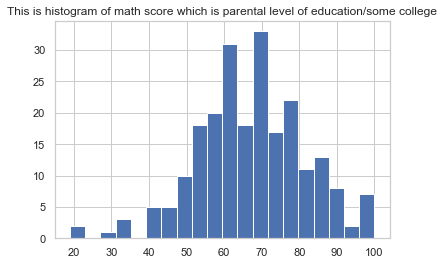

------------------------------------------------
Comparisons for variable: parental level of education
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and as

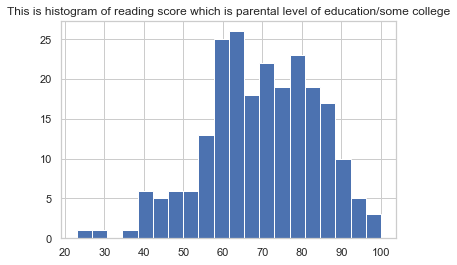

------------------------------------------------
Comparisons for variable: parental level of education
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=2.2048821209085077, pvalue=0.028127555314401052)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-1.0540858949475984, pvalue=0.29329675131787897)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=1.2977969850452833, pvalue=0.19524206483091092)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=5.017577900835298, pvalue=8.804250310784477e-07)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.4039270673798745, pvalue=0.0007561971719730451)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-2.888843374950649, pvalue=0.004165440800640354)
t-test between groups some college and a

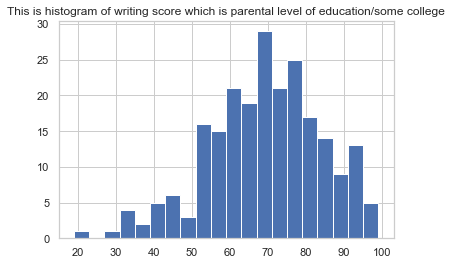

------------------------------------------------
Comparisons for variable: parental level of education
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=2.6803314684632196, pvalue=0.00771101202367254)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.9998741306804844, pvalue=0.3187519641464658)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=2.1159296639133762, pvalue=0.03508162451719667)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=6.547380937127048, pvalue=2.4076253789515874e-10)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=4.667733097498242, pvalue=4.628198526834338e-06)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-3.1687690632394907, pvalue=0.0016985933135959495)
t-test between groups some college and a

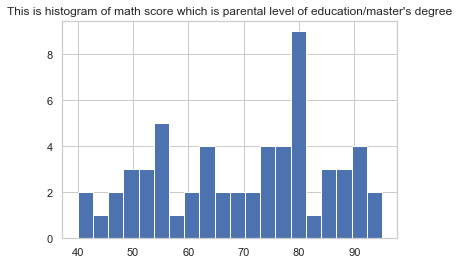

------------------------------------------------
Comparisons for variable: parental level of education
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and as

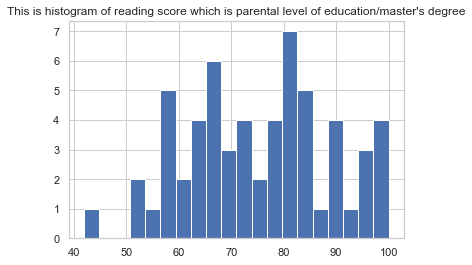

------------------------------------------------
Comparisons for variable: parental level of education
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=2.2048821209085077, pvalue=0.028127555314401052)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-1.0540858949475984, pvalue=0.29329675131787897)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=1.2977969850452833, pvalue=0.19524206483091092)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=5.017577900835298, pvalue=8.804250310784477e-07)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.4039270673798745, pvalue=0.0007561971719730451)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-2.888843374950649, pvalue=0.004165440800640354)
t-test between groups some college and a

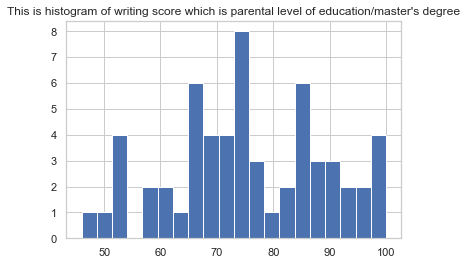

------------------------------------------------
Comparisons for variable: parental level of education
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=2.6803314684632196, pvalue=0.00771101202367254)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.9998741306804844, pvalue=0.3187519641464658)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=2.1159296639133762, pvalue=0.03508162451719667)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=6.547380937127048, pvalue=2.4076253789515874e-10)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=4.667733097498242, pvalue=4.628198526834338e-06)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-3.1687690632394907, pvalue=0.0016985933135959495)
t-test between groups some college and a

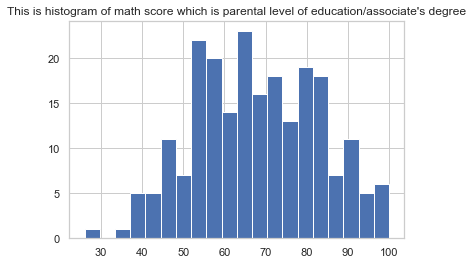

------------------------------------------------
Comparisons for variable: parental level of education
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and as

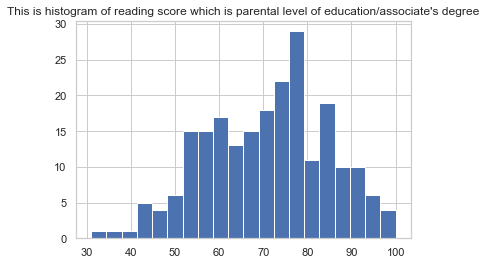

------------------------------------------------
Comparisons for variable: parental level of education
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=2.2048821209085077, pvalue=0.028127555314401052)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-1.0540858949475984, pvalue=0.29329675131787897)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=1.2977969850452833, pvalue=0.19524206483091092)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=5.017577900835298, pvalue=8.804250310784477e-07)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.4039270673798745, pvalue=0.0007561971719730451)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-2.888843374950649, pvalue=0.004165440800640354)
t-test between groups some college and a

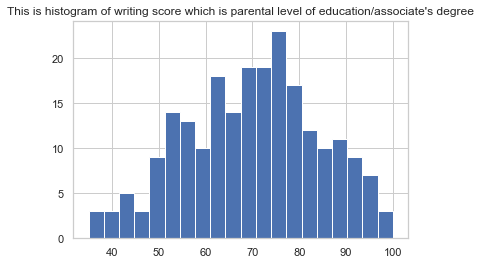

------------------------------------------------
Comparisons for variable: parental level of education
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=2.6803314684632196, pvalue=0.00771101202367254)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.9998741306804844, pvalue=0.3187519641464658)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=2.1159296639133762, pvalue=0.03508162451719667)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=6.547380937127048, pvalue=2.4076253789515874e-10)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=4.667733097498242, pvalue=4.628198526834338e-06)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-3.1687690632394907, pvalue=0.0016985933135959495)
t-test between groups some college and a

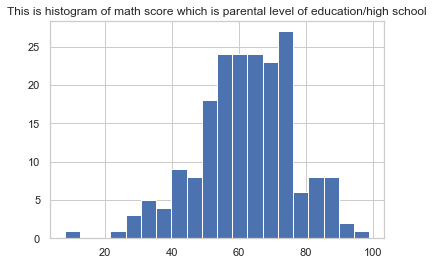

------------------------------------------------
Comparisons for variable: parental level of education
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and as

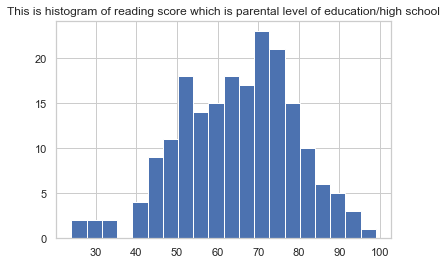

------------------------------------------------
Comparisons for variable: parental level of education
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=2.2048821209085077, pvalue=0.028127555314401052)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-1.0540858949475984, pvalue=0.29329675131787897)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=1.2977969850452833, pvalue=0.19524206483091092)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=5.017577900835298, pvalue=8.804250310784477e-07)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.4039270673798745, pvalue=0.0007561971719730451)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-2.888843374950649, pvalue=0.004165440800640354)
t-test between groups some college and a

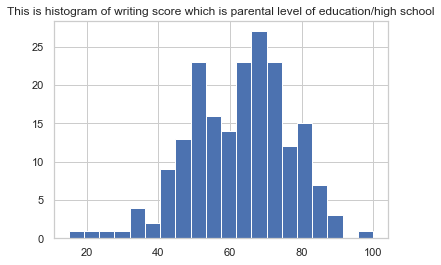

------------------------------------------------
Comparisons for variable: parental level of education
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=2.6803314684632196, pvalue=0.00771101202367254)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.9998741306804844, pvalue=0.3187519641464658)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=2.1159296639133762, pvalue=0.03508162451719667)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=6.547380937127048, pvalue=2.4076253789515874e-10)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=4.667733097498242, pvalue=4.628198526834338e-06)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-3.1687690632394907, pvalue=0.0016985933135959495)
t-test between groups some college and a

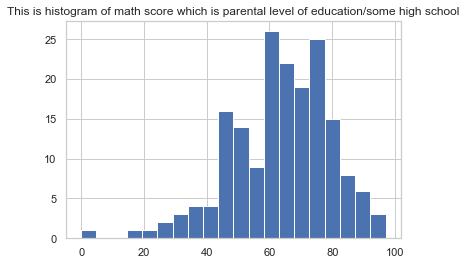

------------------------------------------------
Comparisons for variable: parental level of education
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and as

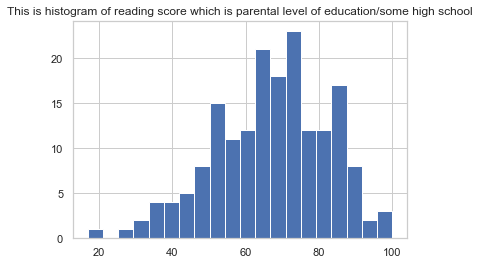

------------------------------------------------
Comparisons for variable: parental level of education
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=2.2048821209085077, pvalue=0.028127555314401052)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-1.0540858949475984, pvalue=0.29329675131787897)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=1.2977969850452833, pvalue=0.19524206483091092)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=5.017577900835298, pvalue=8.804250310784477e-07)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.4039270673798745, pvalue=0.0007561971719730451)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-2.888843374950649, pvalue=0.004165440800640354)
t-test between groups some college and a

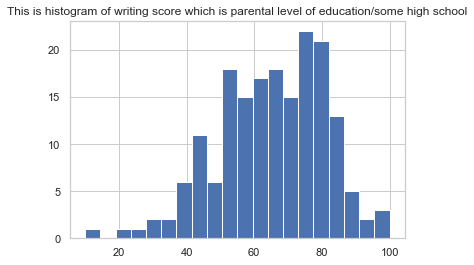

------------------------------------------------
Comparisons for variable: parental level of education
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=2.6803314684632196, pvalue=0.00771101202367254)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.9998741306804844, pvalue=0.3187519641464658)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=2.1159296639133762, pvalue=0.03508162451719667)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=6.547380937127048, pvalue=2.4076253789515874e-10)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=4.667733097498242, pvalue=4.628198526834338e-06)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-3.1687690632394907, pvalue=0.0016985933135959495)
t-test between groups some college and a

In [8]:
from scipy.stats.stats import ttest_ind

for i in ['gender', 'race/ethnicity', 'parental level of education']:
    for j in stp[i].unique():
        for k in ['math score', 'reading score', 'writing score']:
            plt.hist(stp[stp[i]==j][k], bins=20)
            plt.title('This is histogram of {} which is {}/{}'.format(k, i, j))
            plt.show()
            
            ethnicities = stp[i].unique()
            grouped_df = stp.groupby(i)
            print("------------------------------------------------")
            print("Comparisons for variable: {}".format(i))
            print("------------------------------------------------")
            for l in range(0, len(ethnicities)):
                for m in range(l+1, len(ethnicities)):
                    print(
                        "t-test between groups {} and {}:".format(ethnicities[l], ethnicities[m]))
                    print(ttest_ind(
                        stp[stp[i]
                           == ethnicities[l]][k],
                        stp[stp[i] == ethnicities[m]][k]))

Each graph looks like continuous disttribution. And most T-test P-values indicate that the mean between two groups has nothing to do, thus, null-hypothesis were rejected.  
**In this reason, most means between the groups are different.**

### 3. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

In [9]:
stp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score mean
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [10]:
stp['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [11]:
stp.groupby('lunch').mean()

,math score,reading score,writing score,total score mean
lunch,,,,
free/reduced,58.921127,64.653521,63.022535,62.199061
standard,70.034109,71.654264,70.823256,70.837209



This is graph of math score for the standard students


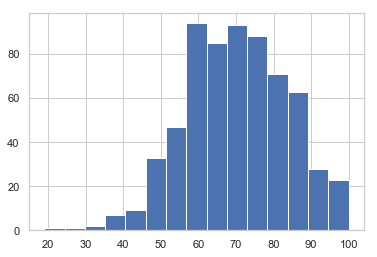


This is graph of math score for the free/reduced students


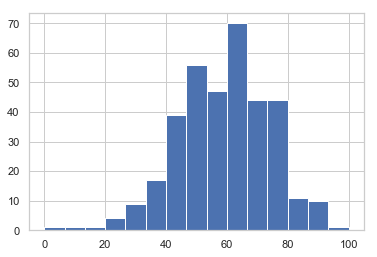


This is graph of reading score for the standard students


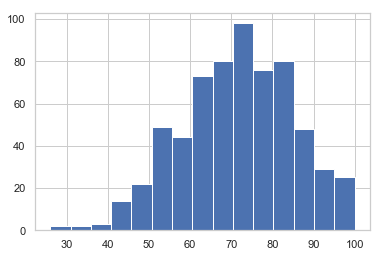


This is graph of reading score for the free/reduced students


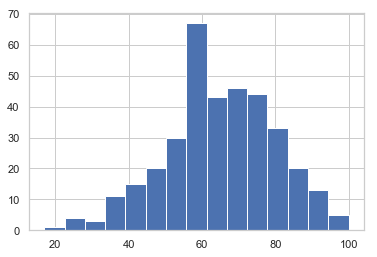


This is graph of writing score for the standard students


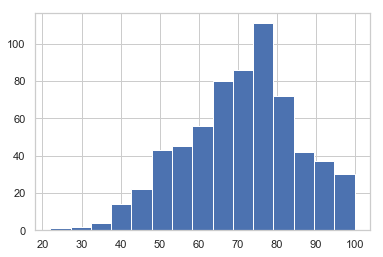


This is graph of writing score for the free/reduced students


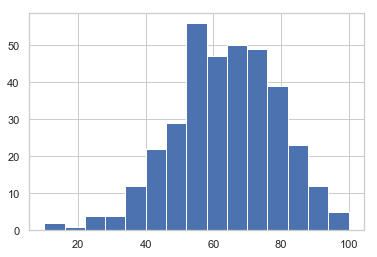


This is graph of total score mean for the standard students


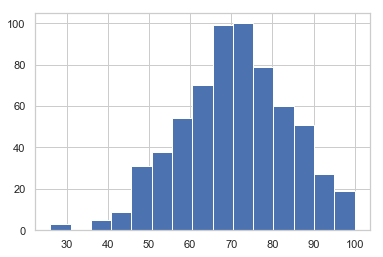


This is graph of total score mean for the free/reduced students


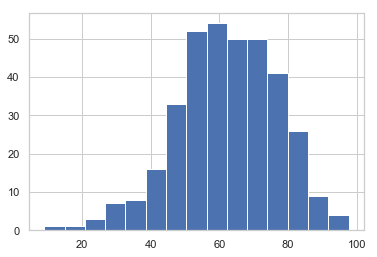

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
This is T-test score between standard and free/reduced of math score
Ttest_indResult(statistic=11.837180472914612, pvalue=2.4131955993137074e-30)


------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
This is T-test score between standard and free/reduced of reading score
Ttest_indResult(statistic=7.451056467473455, pvalue=2.0027966545279011e-13)


------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
This is T-test score between standard and free/reduced of writing score
Ttest_indResult(statistic=8.009784197834758, pvalue=3.186189583166477e-15)


------------------------------------------------
Comparisons for variable: total score mean
------------------------------------------------
T

In [12]:
subject = ['math score', 'reading score', 'writing score', 'total score mean']
meal = ['standard', 'free/reduced']
# plt.figure(figsize=(13,13))
# for l in range(1, len(subject)*len(meal)+1):
#     plt.subplot(len(subject), len(meal), l)
for i in subject:
    for j in meal:
        print()
        print('This is graph of {} for the {} students'.format(i, j))
        plt.hist(stp[stp['lunch']==j][i], bins=15)
        plt.show()

for k in ['math score', 'reading score', 'writing score', 'total score mean']:
    meal = ['standard', 'free/reduced']
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(k))
    print("------------------------------------------------")
    print('This is T-test score between {} and {} of {}'.format(meal[0], meal[1], k))
    print(ttest_ind(stp[stp['lunch']==meal[0]][k], stp[stp['lunch']==meal[1]][k]))
    print()
    print()

With the graphs and T-scores, we could assume that the mean values of subjects between 'standard' meal group and 'free/reduced' meal group have distinguish differences.

### 3. Does the test preparation course seem to have an effect on the exam performances?

For checking this question, we need to extract two groups which have only difference at 'test preparation course'.  
Let's check it out step by step.

In [13]:
stp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score mean
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [17]:
stp.nunique()

gender                           2
race/ethnicity                   5
parental level of education      6
lunch                            2
test preparation course          2
math score                      81
reading score                   72
writing score                   77
total score mean               194
dtype: int64

In [19]:
stp['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [18]:
stp['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

stp[(stp['gender']=='female') & (stp['race/ethnicity']=='group A') & (stp['parental level of education']=="bachelor's degree") & (stp['lunch']=='standard') & (stp['test preparation course']=='none')]
                                                                   
scores = ['math score', 'reading score', 'writing score', 'total score mean']
columns =  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for i in range(0, len(columns)):
    for j in range(1, len(columns)):
        for 

for i in columns:
    for j in stp['gender'].unique():
        for k in stp['race/ethnicity'].unique():
            for l in stp['parental level of education'].unique():
                for m in stp['lunch'].unique():
                    for n in stp['test preparation course'].unique():
                        for o in range(0, len(columns)):
                            for p in range(1, len(columns)):
                                stp[(stp['gender']=='j') & (stp['race/ethnicity']=='group A') & (stp['parental level of education']=="bachelor's degree") & (stp['lunch']=='standard') & (stp['test preparation course']=='none')]

In [43]:
stp_q3 = pd.DataFrame(stp.groupby(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']).mean())

In [44]:
stp_q3

math score  \
gender race/ethnicity parental level of education lunch        test preparation course               
female group A        associate's degree          free/reduced none                      47.666667   
                                                  standard     completed                 60.000000   
                                                               none                      82.000000   
                      bachelor's degree           standard     none                      51.666667   
                      high school                 free/reduced completed                 54.666667   
                                                  standard     completed                 71.500000   
                                                               none                      58.000000   
                      master's degree             free/reduced none                      50.000000   
                                                  standard     none                      50.000000   
                      some college                free/reduced none                      55.000000   
                                                  standard     completed                 75.000000   
                                                               none                      59.250000   
                      some high school            free/reduced none                      46.400000   
                                                  standard     completed                 78.666667   
                                                               none                      59.500000   
       group B        associate's degree          free/reduced completed                 72.000000   
                                                               none                      51.600000   
                                                  standard     completed                 71.200000   
                                                               none                      62.090909   
                      bachelor's degree           free/reduced none                      76.666667   
                                                  standard     completed                 65.500000   
                                                               none                      70.666667   
                      high school                 free/reduced completed                 55.800000   
                                                               none                      48.500000   
                                                  standard     completed                 68.000000   
                                                               none                      62.307692   
                      master's degree             free/reduced completed                 62.333333   
                                                  standard     none                      83.500000   
                      some college                free/reduced completed                 55.333333   
                                                               none                      59.500000   
...                                                                                            ...   
male   group D        high school                 standard     none                      63.571429   
                      master's degree             free/reduced completed                 84.000000   
                                                  standard     none                      83.571429   
                      some college                free/reduced completed                 69.000000   
                                                               none                      63.750000   
                                                  standard     completed                 75.222222   
                                                               none                      68.928571   
        

In [45]:
with pd.option_context('display.max_rows', 1000):
    display(stp_q3)

math score  \
gender race/ethnicity parental level of education lunch        test preparation course               
female group A        associate's degree          free/reduced none                      47.666667   
                                                  standard     completed                 60.000000   
                                                               none                      82.000000   
                      bachelor's degree           standard     none                      51.666667   
                      high school                 free/reduced completed                 54.666667   
                                                  standard     completed                 71.500000   
                                                               none                      58.000000   
                      master's degree             free/reduced none                      50.000000   
                                                  standard     none                      50.000000   
                      some college                free/reduced none                      55.000000   
                                                  standard     completed                 75.000000   
                                                               none                      59.250000   
                      some high school            free/reduced none                      46.400000   
                                                  standard     completed                 78.666667   
                                                               none                      59.500000   
       group B        associate's degree          free/reduced completed                 72.000000   
                                                               none                      51.600000   
                                                  standard     completed                 71.200000   
                                                               none                      62.090909   
                      bachelor's degree           free/reduced none                      76.666667   
                                                  standard     completed                 65.500000   
                                                               none                      70.666667   
                      high school                 free/reduced completed                 55.800000   
                                                               none                      48.500000   
                                                  standard     completed                 68.000000   
                                                               none                      62.307692   
                      master's degree             free/reduced completed                 62.333333   
                                                  standard     none                      83.500000   
                      some college                free/reduced completed                 55.333333   
                                                               none                      59.500000   
                                                  standard     completed                 69.000000   
                                                               none                      62.500000   
                      some high school            free/reduced completed                 62.000000   
                                                               none                      40.750000   
                                                  standard     completed                 54.200000   
                                                               none                      61.666667   
       group C        associate's degree          free/reduced completed                 68.666667   
                                                               none                      58.833333   
        

The result is interesting. Even though are a lot of list, but we only can see the data with two values in 'test preparation course'.  
In a nutshell, not all the completed preparation course groups have higher score than the other. However, almost of the groups of completed test preparation show higher scores on every subject than the other.

### 4. Which 2 exam scores are most correlated with each other?

In [48]:
import scipy.stats as stats
corrmat_stp = stp.corr()
corrmat_stp

,math score,reading score,writing score,total score mean
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
total score mean,0.918746,0.970331,0.965667,1.000000


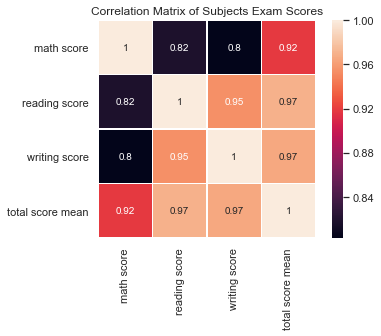

In [49]:
sns.heatmap(corrmat_stp, square=True, annot=True, linewidths=0.5)
plt.title('Correlation Matrix of Subjects Exam Scores')
plt.show()

As you can see the charts and graph, Reading and Writing subjects are so related any others.